In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as ss

## Let us magically import the mpg dataset using seaborn

In [2]:
cars = sns.load_dataset("mpg")

In [3]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
# we can use .min() for a single column or the whole dataframe
cars.min(numeric_only=True)

mpg                9.0
cylinders          3.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
model_year        70.0
dtype: float64

In [6]:
# note that min works for text fields, too (alphabetical minimum)
# to use only numeric fields use min(numeric_only=True)

cars.min()

mpg                                 9.0
cylinders                             3
displacement                       68.0
horsepower                         46.0
weight                             1613
acceleration                        8.0
model_year                           70
origin                           europe
name            amc ambassador brougham
dtype: object

In [8]:
cars.max(numeric_only=True)

mpg               46.6
cylinders          8.0
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
model_year        82.0
dtype: float64

In [9]:
cars.mean(numeric_only=True)

mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.469388
weight          2970.424623
acceleration      15.568090
model_year        76.010050
dtype: float64

In [10]:
cars.median(numeric_only=True)

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model_year        76.0
dtype: float64

In [11]:
cars.mode(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,13.0,4.0,97.0,150.0,1985,14.5,73.0
1,NaN,NaN,NaN,NaN,2130,NaN,NaN


In [12]:
cars['mpg'].mode()

0    13.0
Name: mpg, dtype: float64

In [13]:
cars['mpg'].quantile(.25) ## 25% of the cars have a mpg of 17.5 or below and that 75% of cars have a mpg of more than 17.5##

17.5

## Let's use numpy to generate a normally distributed dataset

<AxesSubplot:xlabel='normal', ylabel='Count'>

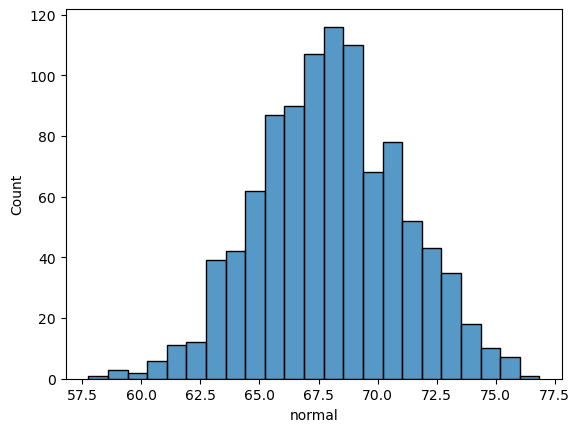

In [15]:
bell=np.random.normal(68,3,1000) # normal(mean, stddev, number of datapoints)
df=pd.DataFrame()
df['normal']=bell
sns.histplot(df['normal'])


<AxesSubplot:xlabel='normal', ylabel='Density'>

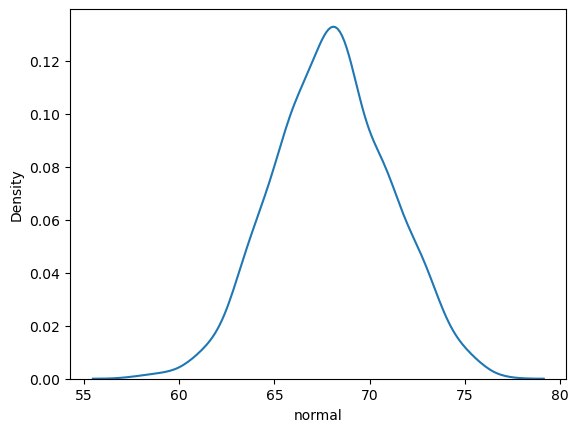

In [16]:
sns.kdeplot(df['normal'])

In [17]:
mean=df['normal'].mean()
sigma=df['normal'].std()

In [ ]:
# use the axvline (vertical line) function to draw 1,2, and 3 sigma lines

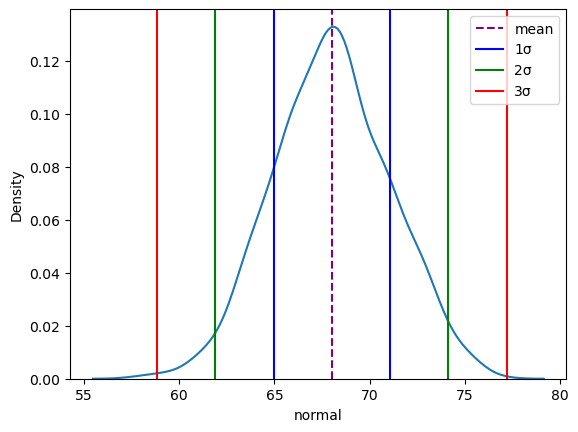

In [18]:
sns.kdeplot(df['normal'])
plt.axvline(mean, color='purple', label='mean', linestyle='--')
plt.axvline(mean+sigma, color='blue', label='1σ')
plt.axvline(mean-sigma, color='blue')
plt.axvline(mean+2*sigma, color='green', label='2σ')
plt.axvline(mean-2*sigma, color='green')
plt.axvline(mean+3*sigma, color='red', label='3σ')
plt.axvline(mean-3*sigma, color='red')
plt.legend()

# Test for normality

Obviously there are limits to visual inspection to determine 'normality'

We can use the scipy stats library to import a statistical test for normality

In [19]:
from scipy.stats import shapiro

In [20]:
# normality test
stat, p = shapiro(df['normal'])
print('Statistic=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print("This looks normal (fail to reject H0)")
else:
	print("This ain't normal (reject H0)")

Statistic=0.998, p=0.488
This looks normal (fail to reject H0)


In [ ]:
# a low p in this case means low probability that the sample is 'normal'

# Descriptive statistics with real data

In [21]:
flowers = sns.load_dataset("iris")

In [22]:
flowers.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [23]:
flowers.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

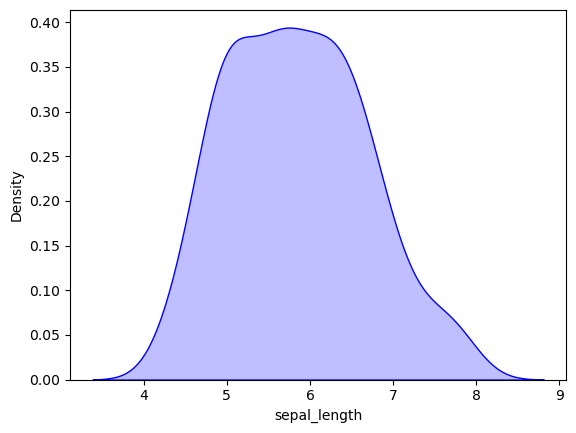

In [24]:
sns.kdeplot(flowers['sepal_length'], color='b', shade=True)

#### To see how 'normal' this distribution is, we can superimpose a true normal on top of the histogram

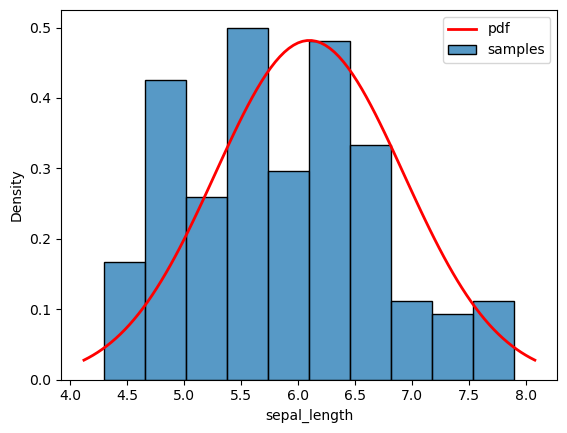

In [25]:
ax = sns.histplot(flowers['sepal_length'], kde=False, stat='density', label='samples', bins=10)
# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = ss.norm.pdf(x_pdf, (x0+x1)/2, flowers['sepal_length'].std() )
ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
ax.legend()

## Is this normal? Shapiro knows!  

In [26]:
# normality test
stat, p = shapiro(flowers['sepal_length'])
print('Statistic=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print("This looks normal (fail to reject H0)")
else:
	print("This ain't normal (reject H0)")

Statistic=0.976, p=0.010
This ain't normal (reject H0)


## Ok let's focus on one species of flower

In [27]:
setosa=flowers[flowers['species']=='setosa']

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

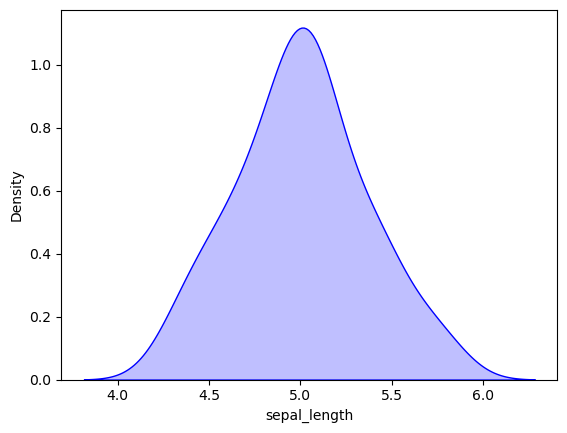

In [28]:
sns.kdeplot(setosa['sepal_length'], color='b', shade=True, label="Setosa")

In [29]:
# normality test
stat, p = shapiro(setosa['sepal_length'])
print('Statistic=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print("This looks normal (fail to reject H0)")
else:
	print("This ain't normal (reject H0)")

Statistic=0.978, p=0.460
This looks normal (fail to reject H0)


In [30]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [31]:
setosa.median(numeric_only=True)

sepal_length    5.0
sepal_width     3.4
petal_length    1.5
petal_width     0.2
dtype: float64

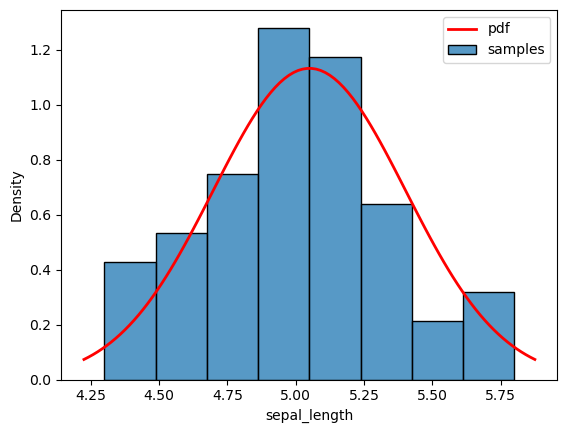

In [32]:
ax2 = sns.histplot(setosa['sepal_length'], kde=False, stat='density', label='samples', bins=8)
# calculate the pdf
x0, x1 = ax2.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = ss.norm.pdf(x_pdf, (x0+x1)/2, setosa['sepal_length'].std() )
ax2.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
ax2.legend()

## Cumulative probability

In [ ]:
## What is the probability of finding a setosa (at random) 
## with a sepal width at most 4.75?

In [33]:
x=4.75
cdf = ss.norm.cdf(x,setosa['sepal_length'].mean(),setosa['sepal_length'].std())
cdf

0.23383896783251346

In [36]:
## What is the probability of finding a setosa (at random) 
## with a sepal width at least 5.5?
x=5.5
cdf = 1-ss.norm.cdf(x,setosa['sepal_length'].mean(),setosa['sepal_length'].std())
cdf

0.08053836399756698